In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
tip = pd.read_csv('tips.csv')
print(tip.to_string())


     total_bill      tip  gender smoker   day    time  size
0       2125.50   360.79    Male     No  Thur   Lunch     1
1       2727.18   259.42  Female     No   Sun  Dinner     5
2       1066.02   274.68  Female    Yes  Thur  Dinner     4
3       3493.45   337.90  Female     No   Sun  Dinner     1
4       3470.56   567.89    Male    Yes   Sun   Lunch     6
5       2411.08   296.48  Female    Yes  Thur   Lunch     2
6       4607.43   374.96  Female     No  Thur  Dinner     4
7       1165.21   700.87  Female     No   Mon  Dinner     2
8       2895.04   347.71    Male     No   Sat  Dinner     5
9       2622.54   253.97    Male    Yes  Thur   Lunch     6
10      2572.40   499.22    Male     No   Wed   Lunch     2
11      1602.30   336.81    Male    Yes   Wed   Lunch     1
12      1888.97   451.26  Female     No  Tues   Lunch     3
13      2643.25   541.73    Male     No   Sun  Dinner     6
14      1899.87   213.64    Male    Yes   Fri  Dinner     4
15      2358.76   156.96  Female    Yes 

# Check out Data

In [9]:
tip.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [10]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  744 non-null    float64
 1   tip         744 non-null    float64
 2   gender      744 non-null    object 
 3   smoker      744 non-null    object 
 4   day         744 non-null    object 
 5   time        744 non-null    object 
 6   size        744 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.8+ KB


In [11]:
tip.describe()

,total_bill,tip,size
count,744.000000,744.000000,744.000000
mean,2165.006640,325.948091,3.180108
std,954.248806,148.778225,1.532890
min,44.690000,0.000000,1.000000
25%,1499.022500,218.000000,2.000000
50%,2102.610000,320.460000,3.000000
75%,2743.802500,415.562500,4.000000
max,5538.290000,1090.000000,6.000000


In [14]:
tip.columns

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

# EDA
Let's create some simple plots to check out the data!

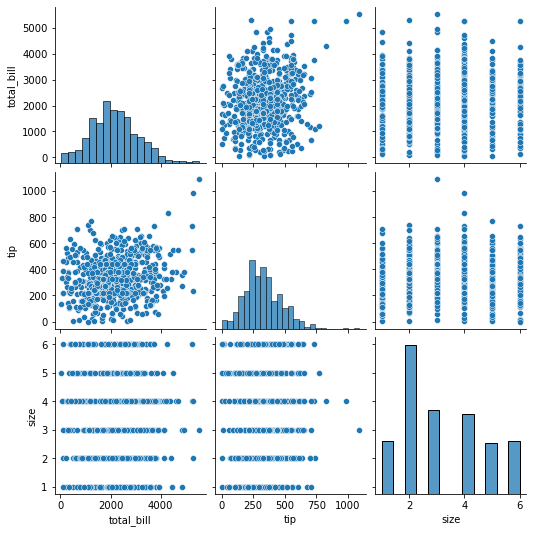

In [15]:
sns.pairplot(tip)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

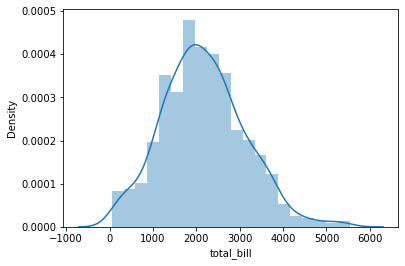

In [47]:
sns.distplot(tip['total_bill'])

<AxesSubplot:>

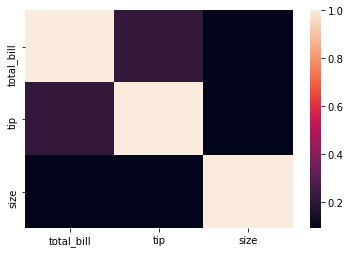

In [19]:
sns.heatmap(tip.corr())

# Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

# X and y arrays

In [35]:
X = tip[['tip', 'size']]
y = tip['total_bill']

# Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creating and Training the Model

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them

In [48]:
# print the intercept
print(lm.intercept_)

1546.21764689274


In [49]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
tip,1.379557
size,64.098975


Interpreting the coefficients:

I made up this data. If you want real data to repeat this sort of analysis, check out the boston dataset:

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)
boston_df = boston.data

# Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [51]:
predictions = lm.predict(X_test)

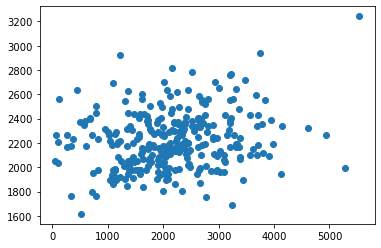

In [52]:
plt.scatter(y_test,predictions)

Residual Histogram

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


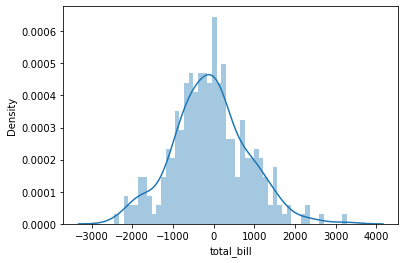

In [53]:
sns.distplot((y_test-predictions),bins=50);

Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|
 
Mean Squared Error (MSE) is the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [54]:
from sklearn import metrics

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 710.2012405475166
MSE: 843186.8678704515
RMSE: 918.252072075229
